In [1]:
from PIL import Image

# Load the image
image_path = r"C:/Users/ALL USER/Desktop/al.png"
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size

# Determine the size of each part
part_width = width // 3
part_height = height // 2

# Split the image into 6 parts
parts = []
for i in range(3):  # 3 parts horizontally
    for j in range(2):  # 2 parts vertically
        left = i * part_width
        upper = j * part_height
        right = (i + 1) * part_width
        lower = (j + 1) * part_height
        part = image.crop((left, upper, right, lower))
        parts.append(part)

# Save the parts
for idx, part in enumerate(parts):
    part.save(f"part_{idx + 1}.png")

print("Image has been split into 6 equal parts.")


Image has been split into 6 equal parts.


In [4]:
import torch
import time

def measure_flops_cpu(n_iter=100, matrix_size=1000):
    # Create random matrices on CPU using float32
    a = torch.randn(matrix_size, matrix_size, dtype=torch.float32)
    b = torch.randn(matrix_size, matrix_size, dtype=torch.float32)

    # Warm-up run
    torch.matmul(a, b)
    
    # Start timing
    start = time.time()
    
    # Perform matrix multiplications
    for _ in range(n_iter):
        torch.matmul(a, b)
    
    # Stop timing
    end = time.time()
    
    # Calculate elapsed time
    elapsed_time = end - start
    
    # Calculate FLOPS
    flops = 2 * matrix_size**3 * n_iter
    gflops = flops / (elapsed_time * 1e9)
    
    print(f"CPU: {torch.get_default_dtype()}")
    print(f"Matrix size: {matrix_size}x{matrix_size}")
    print(f"Number of iterations: {n_iter}")
    print(f"Elapsed time: {elapsed_time:.2f} seconds")
    print(f"Maximum FLOPS: {gflops:.2f} GFLOPS")

# Run the benchmark
measure_flops_cpu()

CPU: torch.float32
Matrix size: 1000x1000
Number of iterations: 100
Elapsed time: 1.68 seconds
Maximum FLOPS: 119.15 GFLOPS


In [1]:
from PIL import Image
import random

def split_image_random(image_path, num_parts=6):
    # Load the image
    image = Image.open(image_path)
    width, height = image.size

    # Generate random split points
    x_splits = sorted([0] + [random.randint(1, width-1) for _ in range(num_parts-2)] + [width])
    y_splits = sorted([0] + [random.randint(1, height-1)] + [height])

    parts = []
    for i in range(len(x_splits) - 1):
        for j in range(len(y_splits) - 1):
            left = x_splits[i]
            upper = y_splits[j]
            right = x_splits[i+1]
            lower = y_splits[j+1]
            
            part = image.crop((left, upper, right, lower))
            parts.append((part, (left, upper, right, lower)))

    return parts

# Use the function
image_path =  r"C:/Users/ALL USER/Desktop/al.png"
parts = split_image_random(image_path)

# Save the parts
for idx, (part, bbox) in enumerate(parts):
    part.save(f"part_{idx + 1}.png")
    print(f"Part {idx + 1} bbox: {bbox}")

print("Image has been split into 6 parts of random sizes.")

Part 1 bbox: (0, 0, 37, 109)
Part 2 bbox: (0, 109, 37, 977)
Part 3 bbox: (37, 0, 42, 109)
Part 4 bbox: (37, 109, 42, 977)
Part 5 bbox: (42, 0, 829, 109)
Part 6 bbox: (42, 109, 829, 977)
Part 7 bbox: (829, 0, 1040, 109)
Part 8 bbox: (829, 109, 1040, 977)
Part 9 bbox: (1040, 0, 1554, 109)
Part 10 bbox: (1040, 109, 1554, 977)
Image has been split into 6 parts of random sizes.


In [105]:
from PIL import Image, ImageDraw
import random

def generate_random_color():
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

def resize_image(image, target_size=(1920, 1080)):
    # Get the original aspect ratio
    aspect_ratio = image.width / image.height
    target_ratio = target_size[0] / target_size[1]

    if aspect_ratio > target_ratio:
        # Image is wider than target, fit to width
        new_width = target_size[0]
        new_height = int(new_width / aspect_ratio)
    else:
        # Image is taller than target, fit to height
        new_height = target_size[1]
        new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_width, new_height), Image.LANCZOS)

    # Create a new image with the target size and paste the resized image centered
    new_image = Image.new("RGB", target_size, (0, 0, 0))
    paste_x = (target_size[0] - new_width) // 2
    paste_y = (target_size[1] - new_height) // 2
    new_image.paste(resized_image, (paste_x, paste_y))

    return new_image

def split_image_random(image_path, num_parts=6, min_size_ratio=0.1):
    # Load and resize the image
    image = Image.open(image_path)
    image = resize_image(image)
    width, height = image.size

    # Create a copy to draw on
    draw_image = image.copy()
    draw = ImageDraw.Draw(draw_image)

    # Calculate minimum size
    min_width = int(width * min_size_ratio)
    min_height = int(height * min_size_ratio)

    # Generate random split points
    def generate_splits(size, num_splits, min_size):
        splits = [0, size]
        for _ in range(num_splits):
            while True:
                new_split = random.randint(min_size, size - min_size)
                if all(abs(new_split - split) >= min_size for split in splits):
                    splits.append(new_split)
                    break
        return sorted(splits)

    x_splits = generate_splits(width, 2, min_width)
    y_splits = generate_splits(height, 1, min_height)

    parts = []
    img_parts = []
    for i in range(len(x_splits) - 1):
        for j in range(len(y_splits) - 1):
            left = x_splits[i]
            upper = y_splits[j]
            right = x_splits[i+1]
            lower = y_splits[j+1]
            
            part = image.crop((left, upper, right, lower))
            img_parts.append(part)
            bbox = (left, upper, right, lower)
            color = generate_random_color()
            
            # Draw the bbox on the image
            draw.rectangle(bbox, outline=color, width=6)
            
            parts.append((part, bbox, color))

    return parts, draw_image,img_parts

# Use the function
image_path = r"C:/Users/ALL USER/Desktop/al.png"
parts, draw_image,img_parts = split_image_random(image_path, min_size_ratio=0.07)

# # Save the parts and the image with bboxes
# for idx, (part, bbox, color) in enumerate(parts):
#     part.save(f"part_{idx + 1}.png")
#     print(f"Part {idx + 1} bbox: {bbox}, color: {color}")

# # Save the image with all bboxes drawn
# draw_image.save("image_with_bboxes.png")

# print(f"Image has been resized to HD, split into {len(parts)} parts of random sizes (with minimum size constraint), and bboxes have been drawn on the image.")

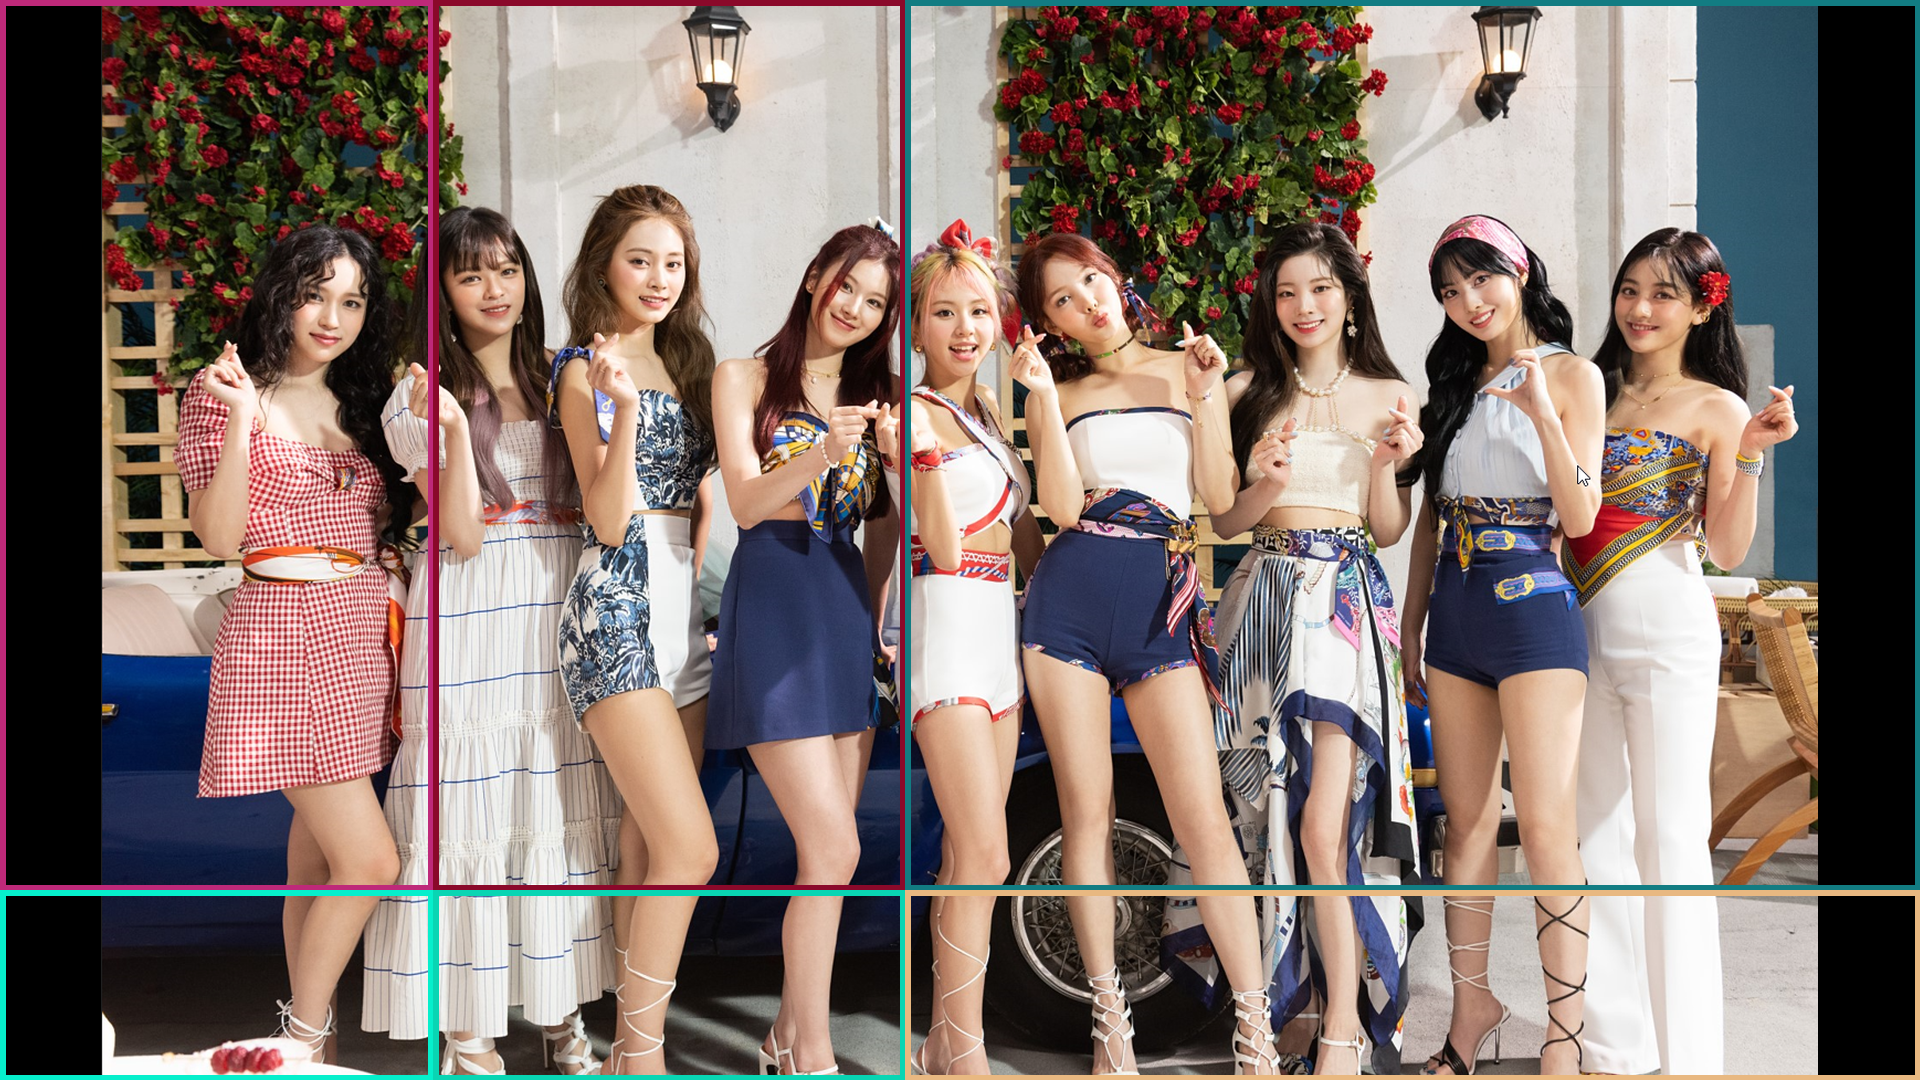

In [106]:
draw_image